<a href="https://colab.research.google.com/github/GMISSAGLIA/GM_PyLab/blob/Main/EU_Curve_PCA_LINALG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We apply Principal Component Analysis - PCA- to analyze IRS - Euribor EU interest rate curve using [Numpy linalg.eig ](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html);

then we will go trough the following steps:

1.   Loading the input data
2.   Transforming the loaded data 
3.   calculating the correlation matrix
4.   calculating Eigenvalues and Eigenvectors of the correlation matrix 
5.   Forming principal components projecting trasformed data into the    eigenvectors 
6.   Graph and Visualizing 





In [1]:
# importing required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sb

from sklearn.decomposition import PCA # for PCA calculation



In [2]:
#we Load the data in a pandas DataFrame from an excel file on github
path = r'https://github.com/GMISSAGLIA/GM_PyLab/blob/Main/T_EUR_CURVE.xlsx?raw=true'
df = pd.read_excel(path,index_col=[0], parse_dates=[0])

In [3]:
def TransformData(dt_in, TransformType= 0):
 dt_out = np.empty_like(dt_in)
 if TransformType == 0:
   dt_out = dt_in.diff()
 elif TransformType == 1:  
  dt_out = dt_in.pct_change()
 else:
  dt_out =  dt_in
 return dt_out   

In [4]:
#we trasform the data applying first difference
df_0  = TransformData(df)
df_1  = df_0[df_0.iloc[:,1].isna()==False]
data = df_1.values

In [5]:
#for the next steps
Dates=list(df_1.index.values)
ColumnsNames = list(df_1.columns)

In [10]:
#then we standardize
#from sklearn.preprocessing import StandardScaler # for standardizing the Data
#sc = StandardScaler() # creating a StandardScaler object
#std_data = sc.fit_transform(data) # standardizing the data

std_data = (data - data.mean())/(data.std())

In [11]:
##and calculate the correlation matrix
Corr_Mat = df_1.corr()
Corr_Mat.shape

(26, 26)

In [22]:
EigIndices =list(["eig_{}".format(x) for x in np.arange(1,27)])
EigIndices

['eig_1',
 'eig_2',
 'eig_3',
 'eig_4',
 'eig_5',
 'eig_6',
 'eig_7',
 'eig_8',
 'eig_9',
 'eig_10',
 'eig_11',
 'eig_12',
 'eig_13',
 'eig_14',
 'eig_15',
 'eig_16',
 'eig_17',
 'eig_18',
 'eig_19',
 'eig_20',
 'eig_21',
 'eig_22',
 'eig_23',
 'eig_24',
 'eig_25',
 'eig_26']

In [28]:

#we get eigenvalues and eigenvectors of the correlation matrix
#eigen_values = vector of n eigenvalues where n is the number of the original variables
#eigen_vectors = matrix n x n containing the n eigenvectors
from numpy.linalg import eigh
eigen_values , eigen_vectors = eigh(Corr_Mat)
pd.DataFrame(eigen_values, index = list(["EigenVector_{}".format(x) for x in np.arange(1,27)]), columns=["Value"] )

,Value
EigenVector_1,0.001398
EigenVector_2,0.001803
EigenVector_3,0.002461
EigenVector_4,0.003071
EigenVector_5,0.003566
EigenVector_6,0.004878
EigenVector_7,0.005079
EigenVector_8,0.005928
EigenVector_9,0.007204
EigenVector_10,0.008918


In [64]:
eigen_values_mat = np.diag(eigen_values)

In [29]:
eigen_vectors.shape

(26, 26)

In [30]:
#Multiplying each eigenvector by the square root of the corresponding eigenvalue we 
#get the loadibgs 
Loadings = eigen_vectors * np.sqrt(eigen_values)

In [40]:
formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':formatter})
#we sort eigenvalues, eigenvectors and loadings in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
sorted_index = np.argsort(eigen_values)[::-1]
sorted_Loadings = Loadings[:,sorted_index]
EigenvaluesPercent= sorted_eigenvalues/np.sum(sorted_eigenvalues)

In [58]:
pd.DataFrame(sorted_eigenvectors, index=ColumnsNames, columns=["EigenVector_{}".format(x) for x in np.arange(1,27)]).to_excel('LINALG_EIGENVECTORS.xlsx')
pd.DataFrame(sorted_eigenvalues, index=["EigenValue_{}".format(x) for x in np.arange(1,27)], columns=["Value"]).to_excel('LINALG_EIGENVALUES.xlsx')
pd.DataFrame(sorted_Loadings,index=ColumnsNames, columns=["Loading_{}".format(x) for x in np.arange(1,27)]).to_excel('LINALG_loadings.xlsx')

Text(0.5, 0, 'Eigenvalue number 1 to 26')

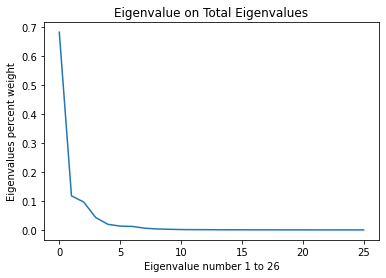

In [59]:
#Graph the eigenvalues
plt.plot(EigenvaluesPercent)
plt.title('Eigenvalue on Total Eigenvalues')
plt.ylabel('Eigenvalues percent weight')
plt.xlabel('Eigenvalue number 1 to 26')

Text(0.5, 1.0, 'Explained Variance of each Principal Component')

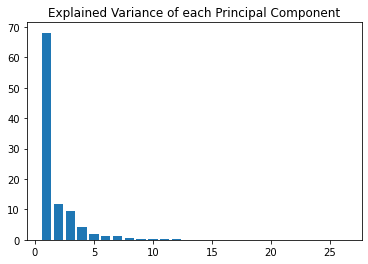

In [60]:
#but it's better using a bar plot
plt.bar(range(1,len(EigenvaluesPercent)+1, 1), EigenvaluesPercent *100 )
plt.title("Explained Variance of each Principal Component")

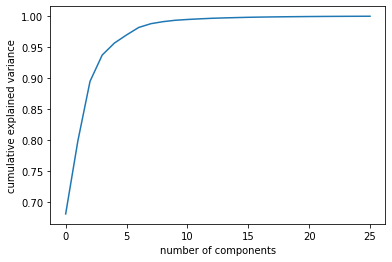

In [61]:
#cumulative explained variance 
plt.plot(np.cumsum(EigenvaluesPercent))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [63]:
df_eigenvalues = pd.DataFrame(sorted_eigenvalues, index = ["Eigenvalue_{}".format(x) for x in np.arange(1,27)], columns = ["Eigenvalue"])
df_eigenvalues = df_eigenvalues.assign(EigValPercentage = lambda x: (x['Eigenvalue'] /x['Eigenvalue'].sum() * 100))
df_eigenvalues.sum()

Eigenvalue           26.0
EigValPercentage    100.0
dtype: float64

In [64]:
df_eigenvalues.head()

,Eigenvalue,EigValPercentage
Eigenvalue_1,17.714329,68.132034
Eigenvalue_2,3.054580,11.748383
Eigenvalue_3,2.501414,9.620822
Eigenvalue_4,1.102505,4.240403
Eigenvalue_5,0.501515,1.928903


In [65]:
df_eigenvalues.describe( )

,Eigenvalue,EigValPercentage
count,26.000000,26.000000
mean,1.000000,3.846154
std,3.493457,13.436371
min,0.001398,0.005376
25%,0.005292,0.020352
50%,0.019831,0.076272
75%,0.274915,1.057366
max,17.714329,68.132034


In [72]:
#then we pick the first 5 Eigenvectors that explain about the 95% variance
n_components = 5
pc_names = ["PC_{}".format(x) for x in np.arange(1,n_components + 1)]
selected_eigenvector = sorted_eigenvectors[:,0:n_components]
df_selected_eigenvector =pd.DataFrame(selected_eigenvector,index = ColumnsNames, columns=pc_names)
#It is a 26 X 5 matrix
#df_selected_eigenvector =pd.DataFrame(selected_eigenvector,columns=pc_names)
#df_selected_eigenvector.set_index(pd.Index(ColumnsNames),inplace=True)

In [73]:
df_selected_eigenvector


,PC_1,PC_2,PC_3,PC_4,PC_5
1W,-0.03,-0.09,0.09,-0.86,0.47
1M,-0.00,-0.36,0.27,-0.31,-0.69
3M,0.02,-0.44,0.26,-0.05,-0.16
6M,0.04,-0.47,0.23,0.18,0.27
12M,0.05,-0.42,0.21,0.33,0.32
1Y,0.18,-0.28,-0.20,0.04,0.15
18M,0.19,-0.18,-0.27,-0.01,0.09
2Y,0.20,-0.15,-0.28,-0.02,0.05
3Y,0.21,-0.11,-0.27,-0.04,-0.00
4Y,0.22,-0.08,-0.23,-0.04,-0.04


In [74]:
#get the PC  product of a 982 X 26 observation matrix by a 26 x 5 Eigenvectors Matrix
PC = np.dot(std_data,selected_eigenvector)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_PC = pd.DataFrame(PC,index = Dates, columns= pc_names)
#df_PC = pd.DataFrame(PC,columns= pc_names)
#df_PC.set_index(pd.Index(Dates),inplace=True)
df_PC

,PC_1,PC_2,PC_3,PC_4,PC_5
2020-01-01,-0.36,0.06,-0.14,0.05,-0.04
2020-01-02,-5.36,-1.08,-1.07,0.06,0.34
2020-01-03,-6.73,-1.28,-1.86,0.80,0.20
2020-01-04,-0.29,0.10,-0.06,0.06,-0.02
2020-01-05,-0.29,0.10,-0.06,0.06,-0.02
...,...,...,...,...,...
2022-09-04,-0.29,0.10,-0.06,0.06,-0.02
2022-09-05,14.23,0.77,-0.94,-0.82,-0.22
2022-09-06,2.26,-2.68,0.34,-0.65,-1.45
2022-09-07,-14.54,-4.23,-4.09,-1.57,0.22


In [68]:
df_PC.to_excel("Linalg_PCA.xlsx" )

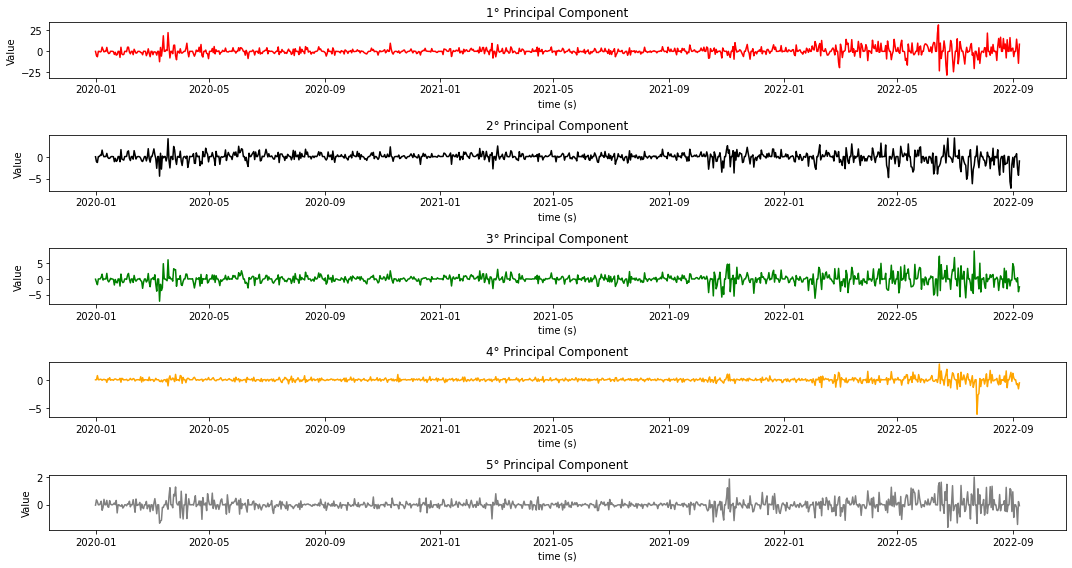

In [75]:
#we get a distinct graph of each principal component
#we could make better iterating but for only 5 component we can repeate lines of code for each subplot

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)

plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
ax1.set_title('1° Principal Component')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Value')

ax2.set_title('2° Principal Component')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Value')

ax3.set_title('3° Principal Component')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('Value')

ax4.set_title('4° Principal Component')
ax4.set_xlabel('time (s)')
ax3.set_ylabel('Value')

ax5.set_title('5° Principal Component')
ax5.set_xlabel('time (s)')
ax5.set_ylabel('Value')

ax1.plot(df_PC['PC_1'], color = 'red')
ax2.plot(df_PC['PC_2'], color = 'black')
ax3.plot(df_PC['PC_3'],color = 'green')
ax4.plot(df_PC['PC_4'],color = 'orange')
ax5.plot(df_PC['PC_5'],color = 'grey')

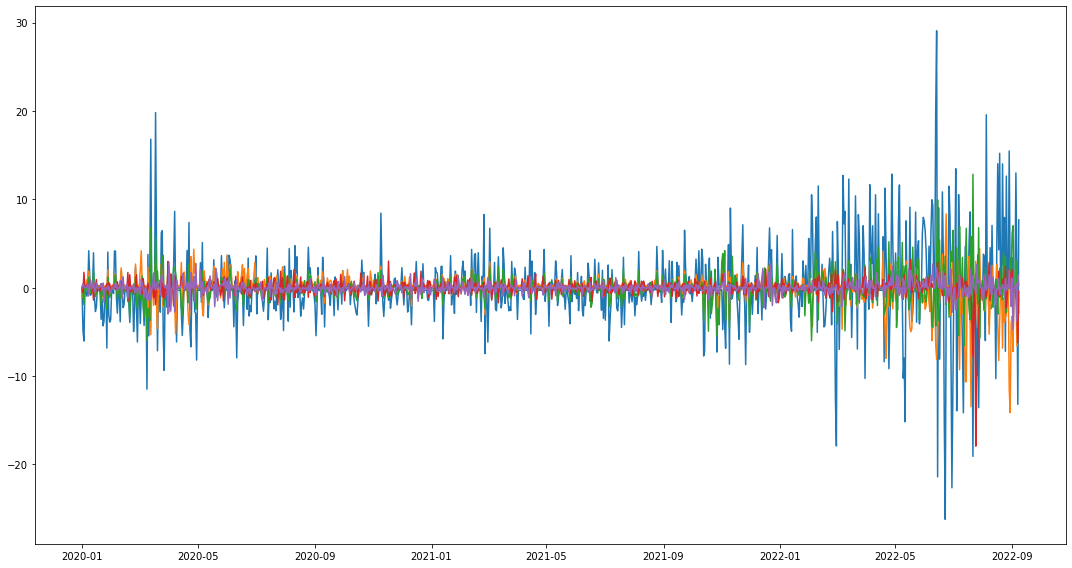

In [36]:
#then super easy  we get a graph for each one of the selected principal components
plt.plot(df_PC)